In [201]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [202]:
df = pd.read_csv('https://raw.githubusercontent.com/ValeriyaTikhonovskaya/dz/main/primary_analisys/cleardataset.csv', sep = '\t')

Наконец почти все данные причесаны, теперь можно смотреть на них под разным углом

Начнем с самого просто: посмотрим на пропуски и заполним их

In [203]:
df.isnull().sum()

опыт работы               91
возраст                   29
образование                0
язык                       0
желаемая з/п               0
Последнее место работы    18
пол_Мужчина                0
волонтерство               0
полная                     0
проектная                  0
стажировка                 0
частичная                  0
регион_Москва              0
регион_Санкт-Петербург     0
dtype: int64

Самым легким будет заменить пропуски в столбце `"Последнее место работы"`. Так как данный столбец мы использовали как флаг того, работает ли сейчас человек или нет, просто заменим все пропуски на 0, потому что, если про последнюю работу ничего не сказано, значит будем считать, что айтишник не работает

In [204]:
df['Последнее место работы'] = df['Последнее место работы'].fillna(0)

Пропуски в столбцах `'возраст'` и `'опыт работы'` заполним медианой (ну типа почему бы и нет)

In [205]:
df['возраст'] = df['возраст'].fillna(df['возраст'].median())
df['опыт работы'] = df['опыт работы'].fillna(df['опыт работы'].median())

In [206]:
df.isnull().sum()

опыт работы               0
возраст                   0
образование               0
язык                      0
желаемая з/п              0
Последнее место работы    0
пол_Мужчина               0
волонтерство              0
полная                    0
проектная                 0
стажировка                0
частичная                 0
регион_Москва             0
регион_Санкт-Петербург    0
dtype: int64

Теперь, когда все пропуски были заполнены, можем посмотреть на распределения данных. Начнем с распределения для ключевой переменной -- `'желаемая з/п'`

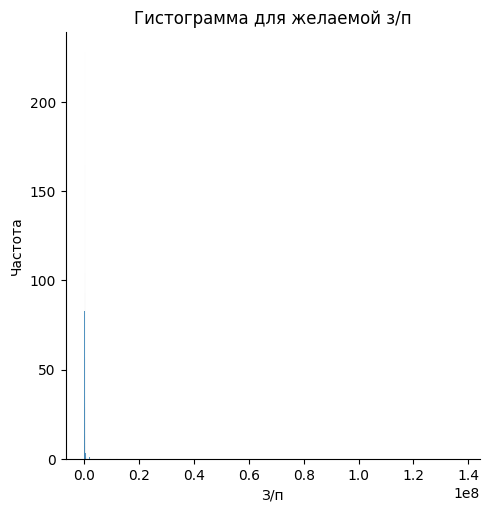

In [207]:
sns.displot(data=df['желаемая з/п'])
plt.title('Гистограмма для желаемой з/п')
plt.xlabel('З/п')
plt.ylabel('Частота')
plt.show()

Как видно на гистограмме, данные имеют достаточно большое количество выбросов, причем довольно существенных настолько, что гистограмма попросту ничего не отображает. Поэтому предврачительно, чтобы хотя бы просто пощупать данные, удалим 8 наибольших значений по з/п. В принципе это даже не портит общую структуру данных, ведь некоторые челы просто по приколу ставили себе желаемую з/п в 1 000 000 000+.

In [208]:
df = df.loc[df['желаемая з/п'] < min(df['желаемая з/п'].nlargest(8))]

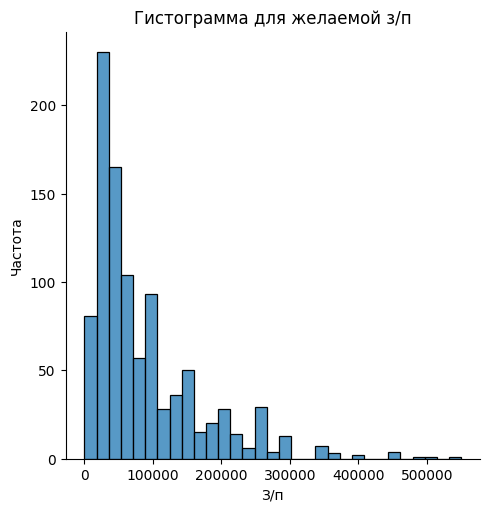

In [209]:
sns.displot(data=df['желаемая з/п'])
plt.title('Гистограмма для желаемой з/п')
plt.xlabel('З/п')
plt.ylabel('Частота')
plt.show()

После первой наивной обработки, данные стали выглядеть гораздо лучше и теперь мы уже можем посмотреть и пощупать чуть лучше наши данные. Как видно на рисунке присутствуют неадекватные хвосты, скорее всего это и есть выбросы. Чтобы ответить точно построим ящик с усами.

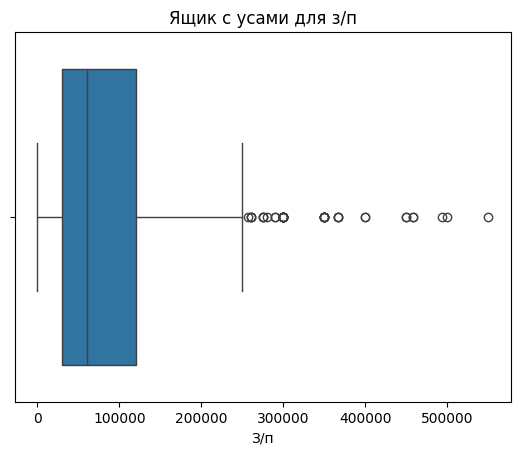

In [210]:
sns.boxplot(data=df, x = 'желаемая з/п')
plt.title('Ящик с усами для з/п')
plt.xlabel('З/п')
plt.show()

Данная диаграмма показывает нам, что выбросов действительно довольно много и все они лежат примерно после 250 000. Так как скорре всего это люди, которые ставят такие зарплаты "рофла ради", или гипер зажравшиеся сеньоры, которые уже не ищут работу на хэд хантере, просто выкинем из выборки все выбросы.

In [211]:
Q1 = df['желаемая з/п'].quantile(0.25)
Q3 = df['желаемая з/п'].quantile(0.75)
IQR = Q3 - Q1
max_must = Q3 + 1.5*IQR
min_must = Q1 - 1.5*IQR
df = df[(df['желаемая з/п'] >= min_must) & (df['желаемая з/п'] <= max_must)]
df

,опыт работы,возраст,образование,язык,желаемая з/п,Последнее место работы,пол_Мужчина,волонтерство,полная,проектная,стажировка,частичная,регион_Москва,регион_Санкт-Петербург
0,24.0,45.0,0,0,100000.00,1.0,1,0,1,0,0,0,0,1
1,26.0,49.0,1,1,157869.27,1.0,1,0,1,0,0,0,0,0
2,2.0,23.0,0,0,200000.00,1.0,1,0,1,0,0,0,0,0
3,25.0,56.0,1,0,50000.00,1.0,1,0,1,1,0,1,0,0
4,12.0,38.0,1,1,90000.00,1.0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,10.0,39.0,1,1,30000.00,0.0,1,0,1,0,0,0,0,1
995,4.0,25.0,0,0,30000.00,1.0,1,0,1,0,0,0,0,0
996,10.0,30.0,1,0,95000.00,0.0,1,0,1,0,0,1,1,0
997,13.0,33.0,1,0,120000.00,1.0,1,0,1,0,0,0,1,0


Небольшие выводы:
1) Абсолютное большинство готово работать за грошики (около 30 тыс. рублей)
2) Гистограмма показывает резкое увеличение количества людей, после снижения зарплаты. Сначала, при увеличении уровня з/п частота резко снижается, а потом после очередного увеличения резко возрастает, и это не разовое явление. Как вариант это может объясняться переходом между категориями (джун-мидл-сеньор). Также объясняться это может как раз переходом между регионами.

Теперь поисследуем непрерывные признаки, для этого сначала посмотрим их распределения

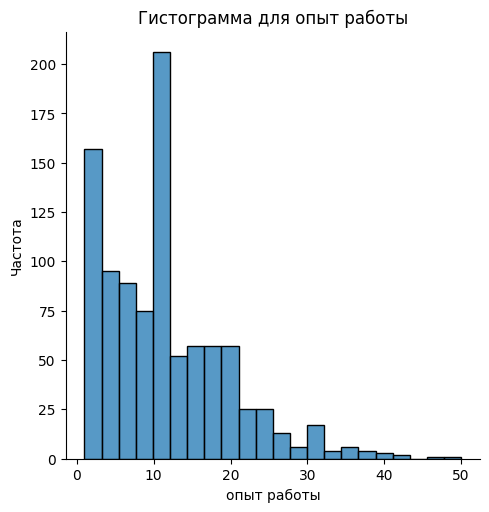

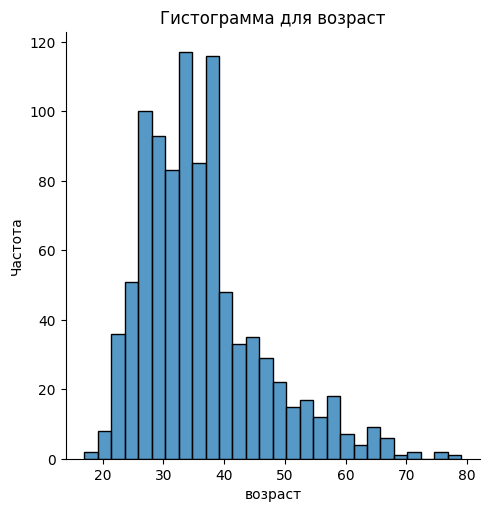

In [212]:
for el in ['опыт работы', 'возраст']:
  sns.displot(data=df[el])
  plt.title('Гистограмма для ' + el)
  plt.xlabel(el)
  plt.ylabel('Частота')
  plt.show()

Как видно из вышестоячих графиков, здесь мы тоже имеем дело с выбросами. Можно конечно закидать нас всяким вонючим, но в айтишников 70+ c опытом работы 40+ ну очень слабо верится, скорее всего мы снова имеем дело с прЕколистами, ну либо исключительными машинами, которые портят всю статистику. Однако перед тем, как с ними попрощаться, посмотрим на ящики с усами.

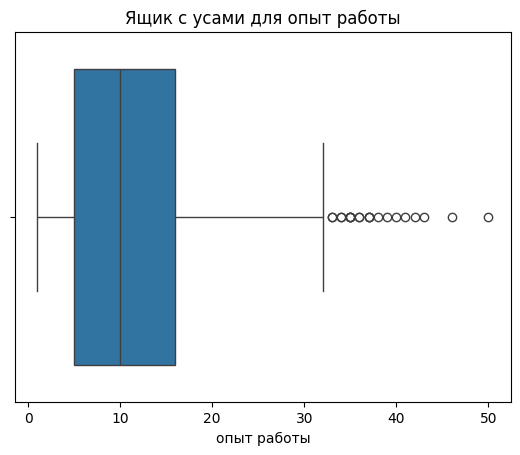

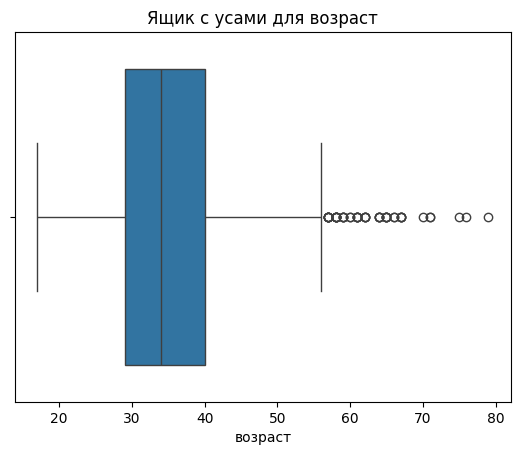

In [213]:
for el in ['опыт работы', 'возраст']:
  sns.boxplot(data=df, x = el)
  plt.title('Ящик с усами для ' + el)
  plt.xlabel(el)
  plt.show()

Ну чтд собсна. Нещадно выпиливаем выбросы!

In [214]:
for el in ['опыт работы', 'возраст']:
    Q1 = df[el].quantile(0.25)
    Q3 = df[el].quantile(0.75)
    IQR = Q3 - Q1
    max_must = Q3 + 1.5*IQR
    min_must = Q1 - 1.5*IQR
    df = df[(df[el] >= min_must) & (df[el] <= max_must)]
df

,опыт работы,возраст,образование,язык,желаемая з/п,Последнее место работы,пол_Мужчина,волонтерство,полная,проектная,стажировка,частичная,регион_Москва,регион_Санкт-Петербург
0,24.0,45.0,0,0,100000.00,1.0,1,0,1,0,0,0,0,1
1,26.0,49.0,1,1,157869.27,1.0,1,0,1,0,0,0,0,0
2,2.0,23.0,0,0,200000.00,1.0,1,0,1,0,0,0,0,0
3,25.0,56.0,1,0,50000.00,1.0,1,0,1,1,0,1,0,0
4,12.0,38.0,1,1,90000.00,1.0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,10.0,39.0,1,1,30000.00,0.0,1,0,1,0,0,0,0,1
995,4.0,25.0,0,0,30000.00,1.0,1,0,1,0,0,0,0,0
996,10.0,30.0,1,0,95000.00,0.0,1,0,1,0,0,1,1,0
997,13.0,33.0,1,0,120000.00,1.0,1,0,1,0,0,0,1,0


Пришло время выводов от мудрого царя:
1) Большинство айтишников начинают осознавать себя таковыми после примерно 22 лет, большая часть при этом 30+
2) Среди айтишников также есть и пожилые люди и не сказать, что их прям очень мало
3) Большая часть наших подопечных имеют опыт окол 10 лет, что очень даже ожидаемо, ведь это направление начало активно разваиваться в России как раз тогда
4) Однако из-за того, что очередной бум зарплат и популярности данной отрасли произошел относительно недавно, на рынке также присутствует достаточно много малоопытных людей (год - два)

Теперь можно и на категориальные переменные глянуть. Для них построим столбчатые диаграммы.

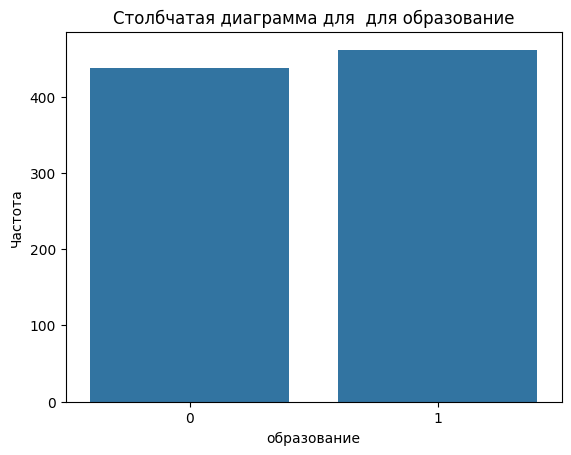

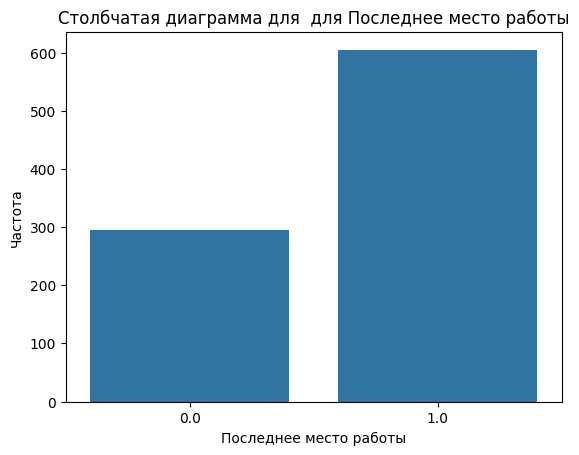

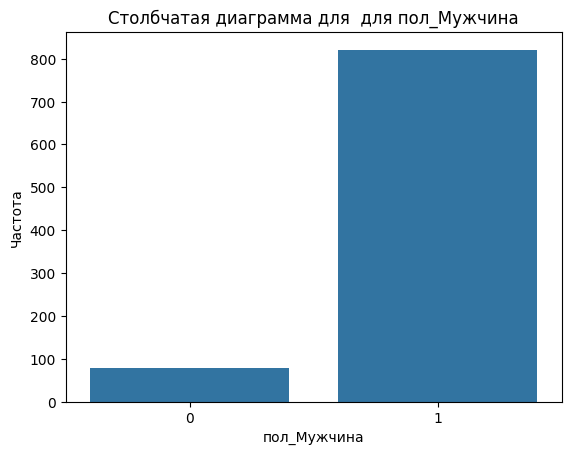

In [215]:
for el in ['образование', 'Последнее место работы',	'пол_Мужчина']:
  sns.countplot(x=el, data=df)
  plt.title('Столбчатая диаграмма для  для '+ el)
  plt.xlabel(el)
  plt.ylabel('Частота')
  plt.show()

И так что можно сказать про наших подопечных:
1) Количество людей с высшим образованием и без примерно одинаковое, что кстати несильно то и удивительно, ведь с ростом популярности различных онлайн курсов, чуть ли не каждый второй захотел стать айтишником с образованием и без.
2) Среди выбранных для исследования людей довольно мало людей, которые готовы работать только не полный день и только над проектами. Большая же часть айтишников готовы рассмотреть для себя различные варианты занятости, однако абсолютное большинство хочет РАБотать фулл дэй и рассматривает только такой вариант. Что ж это не удивительно, ведь большая часть это люди 30+, а они уже куда реже ищут халтурку на пол дня.
3) Также можно заметить, что проектная занятость меньше всего пользуется спросом. Люди предпочитают в своих анкетах ставить полную и частичную занятость. И правильно деды на работе целую смену стояли и ничего, и пятилетки за две недели были.
4) Большая часть людей уже закреплена за каким-то местом работы, но при этом все равно выставляют свои анкеты, хоть их и не сильно больше. Связано это скорее всего с тем, что айтишники постоянно ищут бОльшие зарплаты и за деньги готовы на все (скажем так, у них непрерывная вертикальная мобильность, ведь в разных компаниях на одних и тех должностях з/п может очень сильно отличаться)
5) Мужчин айтишников большинство (опять таки, кто бы сомневался).

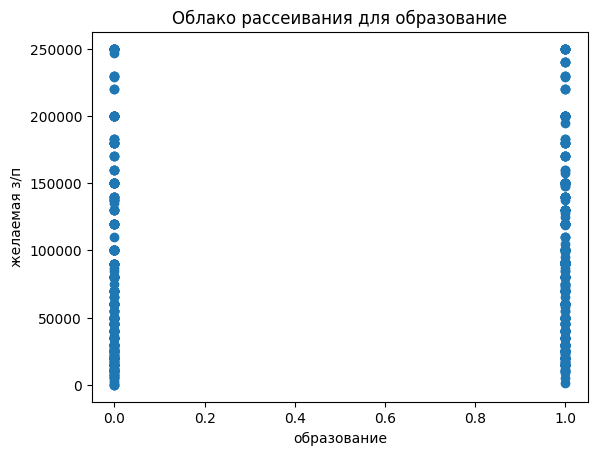

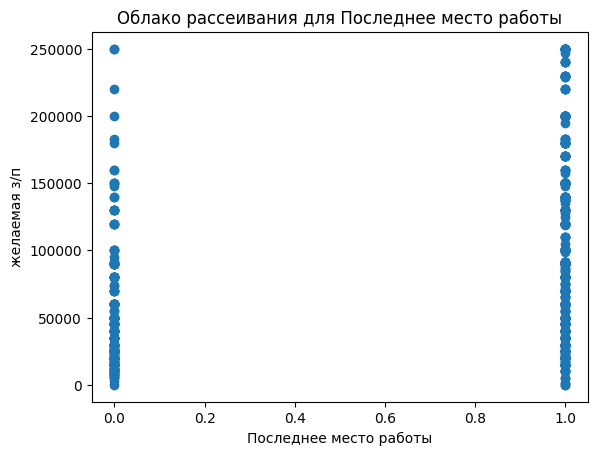

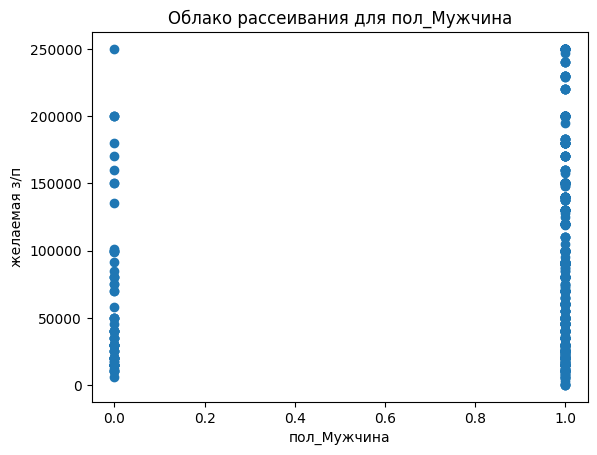

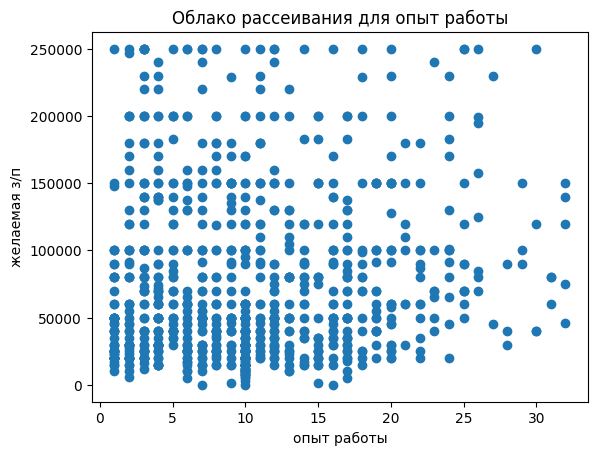

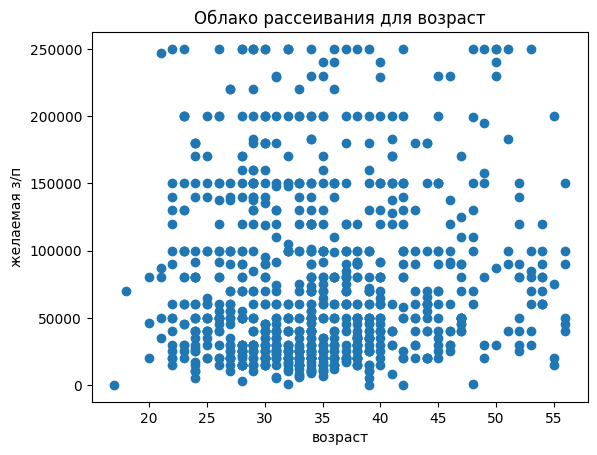

In [216]:
for el in ['образование', 'Последнее место работы',	'пол_Мужчина', 'опыт работы', 'возраст']:
  plt.figure()
  plt.scatter(df[el], df['желаемая з/п'])
  plt.xlabel(el)
  plt.ylabel('желаемая з/п')
  plt.title('Облако рассеивания для ' + el)

Здесь все достаточно грустно. Практически все облака не показывают хорошей взаимосвязи между признаками и объясняемой переменной. Однако ложка меда все таки нашлась:
1) Мужчины чаще требуют более высокую зарплату (ХЫ), но тут это можно скорее объяснить тупо бОльшим количеством мужчин на рынке труда.
2) Ребята и девчонки, которые сейчас работают ставят желаемый уровень з/п выше. Тоже не очень удивительно, ведь они могут борзеть, так как ничего не теряют.
3) Среди образованных людей как-будто-то бы более выский уровень желаемой з/п в среднем.
Про непрерывные признаки особо ничего и не скажешь, там будто просто случайная величина независящая от них. Как вариант это может объясняться разницей внутри регионов.

На последок, перед тем как начать обучать различные модели, посмотрим на корреляцию между признаками. Для этого составим корреляционную матрицу

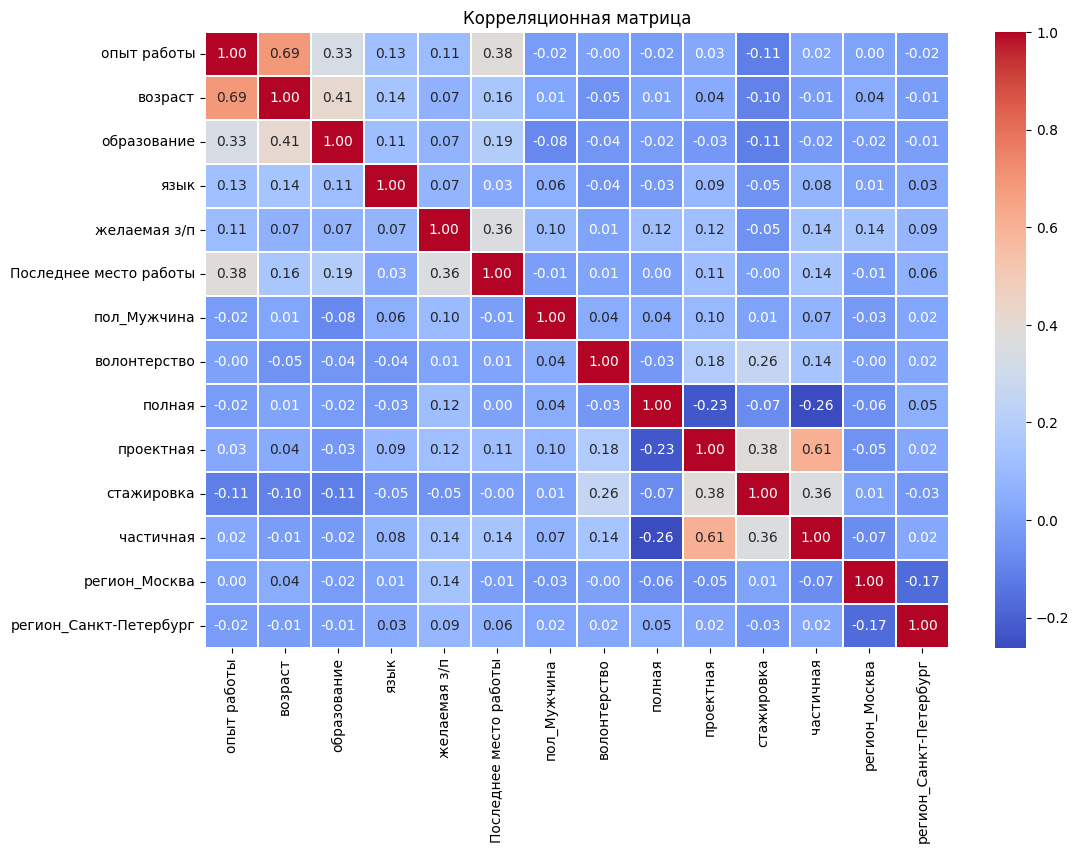

In [217]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.3)
plt.title('Корреляционная матрица')
plt.show()

Из интересного здесь можно заметить три вещи:
1) Самое очевидно -- между возрастом и опытом работы имеется неслабая корреляция, но не полная
2) Желание людей работать на частичной занятости положительно коррелирует с желанием работать просто на проектом (что тоже как бы частично или удаленно), опять таки это было довольно очевидно
3) Кроме вышеназванных взаимосвязей, других практически не наблюдается (коэффициенты корреляций слишком малы), а это повод полагать, что между нашими признаками нет линейной взаимосвязи, но мы...

In [218]:
df.to_csv('ML_data.csv', sep='\t', encoding='utf-8', index = False)